# How to fatten the tails

Based on David Salazar's post [What does it mean do fatten the tails?](https://david-salazar.github.io/2020/05/09/what-does-it-mean-to-fatten-the-tails/)

A PDF must sum to 1. If we fatten the tails, something else must get thinner. We, then, can ask, "Where do the tails come from?"

We can fatten a normal with as stochastic standard deviation:

$$ p = \frac{1}{2}, X \sim Normal(0, \theta \sqrt{1 - \alpha})$$
$$ 1-p = \frac{1}{2}, X \sim Normal(0, \theta \sqrt{1 + \alpha})$$

Where $0 < \alpha \leq 1$.

For David's simulation, he simulates for $\theta = 1$ and $\alpha = 0.8$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def simulate_fat(a, samples):
    
    p = np.random.binomial(samples, p=0.5)
    q = samples - p
    
    psims = np.random.normal(0, np.sqrt(1 - a), p)
    qsims = np.random.normal(0, np.sqrt(1 + a), q)
    
    return np.concatenate((psims, qsims), axis=None)

In [10]:
samples = 1000

normal = np.random.normal(0, 1, samples)
fattened_normal = simulate_fat(0.8, samples)

Text(0.5, 1.0, 'Fattened normal vs standard normal')

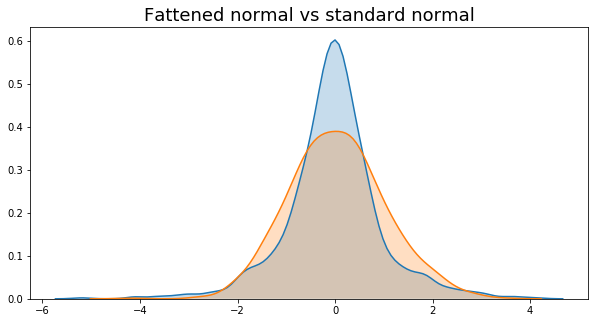

In [45]:
plt.figure(figsize=(10, 5))

sns.kdeplot(fattened_normal, shade=True)
sns.kdeplot(normal, shade=True)

plt.title('Fattened normal vs standard normal', fontsize=18)

# Convexity of scale

The next thing Taleb and Salazar do is to play with the scale of the distribution. We can tweak the values of $\alpha$ to get an idea of how the distribution responds to changes in scale. We discover that probabilities in the tails are convex to $\alpha$. 

This can be seen easily with several plots.

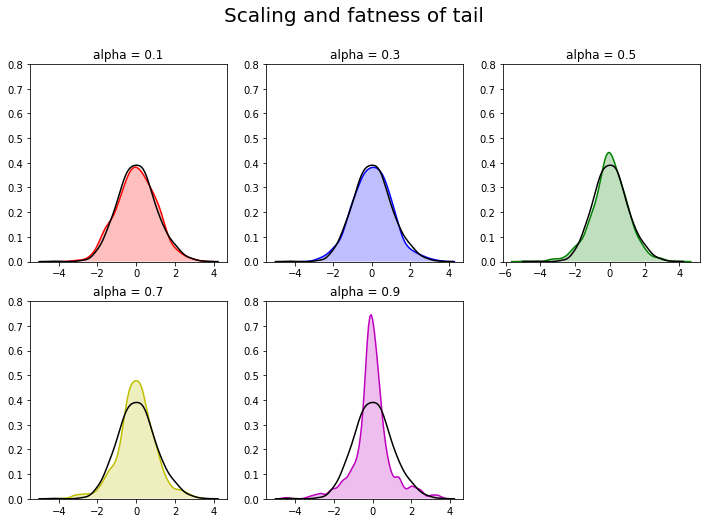

In [51]:
plt.figure(figsize=(12, 8))
plt.suptitle('Scaling and fatness of tail', fontsize=20)
for i, a in enumerate([round(0.1 + a * 0.2, 1) for a in range(5)]):
    
    plt.subplot(2, 3, i+1)
    plt.ylim(0, 0.8)
    plt.title('alpha = {}'.format(a))
    fat_normal = simulate_fat(a, 1000)
    sns.kdeplot(fat_normal, shade=True, color="rbgym"[i])
    sns.kdeplot(normal, color='black')
    
    

Or stacked:

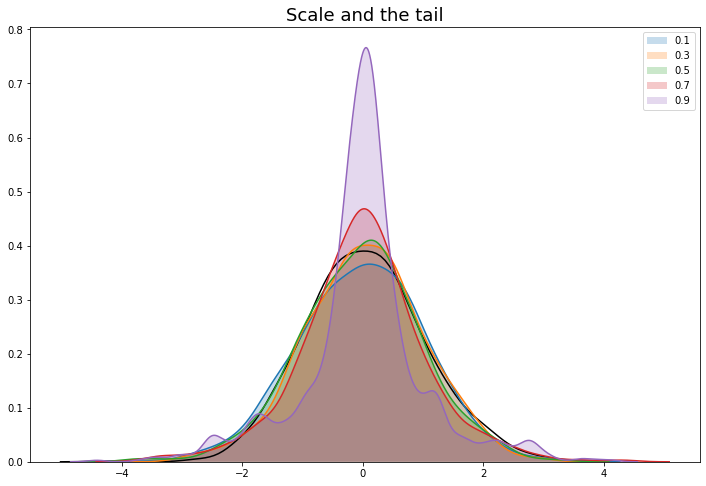

In [44]:

plt.figure(figsize=(12, 8))
sns.kdeplot(normal, color='black')

leg = []
for i, a in enumerate([round(0.1 + a * 0.2, 1) for a in range(5)]):
        
    leg.append(a)

    fat_normal = simulate_fat(a, samples)
    sns.kdeplot(fat_normal, shade=True, gridsize=10000)

      
plt.title('Scale and the tail', fontsize=18)
plt.legend(leg)

David:

> Thus, we arrive at a problem: probability estimation at the tails is unreliable. If we cannot reliably estimate the standard deviation, then the errors will propagate non-linearly into the estimation of tail probabilities.

The intuition for this is simple. Because of convexity, an error in estimation of standard deviation them expandas nonlinearly into tail probabilities.